# Module 3 Assessment

# Justin Tennenbaum

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

**Note on the short answer questions**: For the short answer questions please use your own words. The expectation is that you have not copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [3]:
# import the necessary libraries
import numpy as np
import pandas as pd 
from scipy import stats
from math import factorial
import matplotlib.pyplot as plt
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions [Suggested time: 20 minutes]

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Calculate the following probabilities and assign to the variables `ans1` and `ans2`, respectively, in the next cell:

1.a.1) $P(A and B)$
1.a.2) $P(A|B)$

Hint: draw a diagram!


In [2]:
ans1 = 0.7*0.4
ans2 = ans1/0.5
print(ans1,ans2)

0.27999999999999997 0.5599999999999999


### b. Card Combinatorics

A standard deck of playing cards consists of 52 cards in each of the four suits of spades, hearts, diamonds, and clubs. Each suit contains 13 cards: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, and King.
    
You have a standard deck of 52 cards and are asked the following questions:

1.b.1) What is the probability of drawing a King or a Queen?

1.b.2) How many possible 5-card combinations can be formed with this deck of 52 cards?

Answer the questions below:

In [4]:
ans1 = 2/13
ans2 = factorial(52)/(factorial(47)*factorial(5))
print(ans2)

2598960.0


### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (Jack, Queen, or King). 

The function `probability_of_scoring_k` is provided below. In this function, $k$ is the number of points won in the game, $n$ is the number of draws, and $p$ is the probability of winning a point. The function returns the corresponding probability of scoring $k$ points given $n$ and $p$.

In [5]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    
    # defining a helper function for factorial
    def fact(n):
        return np.math.factorial(n)
    
    return (fact(n)/(fact(k)*fact(n-k)))*(p**(k))*((1-p)**(n-k))

1.c.1) What is the probability $p$ of winning a point? 

In [6]:
# your code here 
p = 3/13 

1.c.2) Use the function `probability_of_scoring_k` to compute the probability of scoring 8 points out out of 22 draws.

In [7]:
# your code here 
ans1 = probability_of_scoring_k(22,3/13,8)
print(ans1)

0.06532117736042573


1.c.3) Use the function `probability_of_scoring_k` to calculate the probability of drawing $k$ points out of 22 draws, for $k$ ranging from 0 to 22. 

_Hint: Your final result should be in the form of a list or array._

In [8]:
# your code here
ks= []
k_values = range(23)
for k in k_values:
    ks.append(probability_of_scoring_k(22,3/13,k))

1.c.4) Plot your results to create the probability mass function. Use a bar plot. What type of distribution does the `probability_of_scoring_k` have?

<BarContainer object of 23 artists>

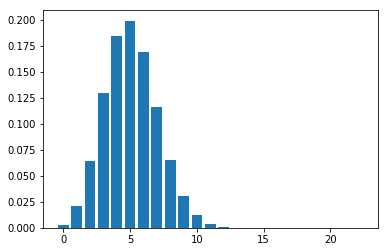

In [11]:
# your code here 
plt.bar(x=k_values,height=ks)

# answer here
the distribution of probability of scoring k is a binomial distribution

## Part 2: Statistical Distributions [Suggested time: 25 minutes]

### a. Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

2.a.1) Write a function to compute the z-scores for single checks of amount `check_amt`.

In [12]:
def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    mu = 20
    std = 2
    return (check_amt-mu)/std

2.a.2) I go to the TexMex restaurant and get a check for 24 dollars. 

Use your function to compute your check's z-score, and interpret the result using the empirical rule. 

In [13]:
# your code here 
z_score(24)

2.0

# your answer here
with a z_score of 2, we can assume that roughly 95% of the data lies within that z_score by the 68,95,99.7 rule

2.a.3) Using $\alpha = 0.05$, is my 25 dollar check significantly **greater** than the mean? How do you know this?  

Hint: Here's a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [19]:
# your code here 
p_value = 1-stats.norm.cdf(2)
p_value

0.02275013194817921

# your answer here 
since we care if the mean is greater we use a 1 tailed test to compare it to an alpha of 0.05, our p-value is 0.022 which is less than 0.05 so we can reject the null hypothesis that it is not statistically greater

### b. Confidence Intervals and the Central Limit Theorem

2.b.1) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [22]:
# your code here 
mu = 20
std = 2
z = stats.norm.ppf(q=0.975)

CI = [mu - (z*std), mu + (z*std)]
CI

[16.080072030919894, 23.919927969080106]

# your written answer here
it means that 95% of the values we obtain will be within the above confidence intervals

2.b.2) Imagine that we didn't know how the population of check totals was distributed. How would **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

# Your written answer here
by sampling from the distribution we can estimate the population parameters, by CLT as our number of samples grow, 
our sample mean approaches the population mean, so by sampling a large enough group we can estimate population mean,
this sample mean we create will be a point estimate of population mean. So by sampling repeatedly we can also create the sampling distribution of the mean, which by CLT will be normally distributed even if the population is not

## Part 3: Statistical Testing [Suggested time: 15 minutes]

The TexMex restaurant recently introduced Queso to its menu.

We have random samples of 1000 "No Queso" order check totals and 1000 "Queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

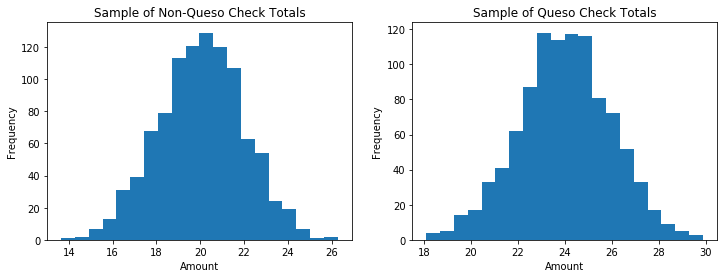

In [23]:
# Load the sample data 
no_queso = pickle.load(open("data/no_queso.pkl", "rb"))
queso = pickle.load(open("data/queso.pkl", "rb"))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### a. Hypotheses and Errors

The restaurant owners want to know if customers who order Queso spend **more or less** than customers who do not order Queso.

3.a.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

# Your written answer here
H0 = the spending means of queso eaters and non queso eaters are equal to eachother

hA = the spending means of queso eaters are not equal/differ to queso eaters

3.a.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

# your answer here
type 1 error = the means are actually the same, but we reject the null hypothesis and say they are different

type 2 error = the means are actually different, but we fail to reject to the null hypothesis and say they are the same

### b. Sample Testing

3.b.1) Run a statistical test on the two samples. Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance. Can you reject the null hypothesis? 

_Hint: Use `scipy.stats`._

In [46]:
queso.mean()

23.992814607054243

In [45]:
no_queso.mean()+queso.std()*2

23.999665557894616

In [35]:
stats.ttest_ind(a=queso,b=no_queso)

Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

In [37]:
# your code here 

stats.t.ppf(q=0.975,df=len(queso)+len(no_queso)-2)

1.9611520148367056

# your answer here
we get a test statistic of 45.16 which is much larger than than our t-critical value of 1.96,
therefore we can reject the null hypothesis that queso and no queso eaters spend the same mean amount

## Part 4: Bayesian Statistics [Suggested time: 15 minutes]
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

4.a.1) What is the probability of Thomas getting a small puppy?
4.a.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
4.a.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4.a.4) For Part 2, what is the prior, posterior and likelihood?

In [51]:
ans1 = .6*.2 + .1*.8
ans2 = (.1*.2)/(.1*.2 + .8*.55)
ans3 = "given than we got a small dog it is more likely we went to the store (.12>.08)"
ans4_prior = "p(petstore) = 0.2" 
ans4_posterior = "p(petstore|big) = ans2 = .043478"
ans4_likelihood = "p(big|petstore) = .1" 